# Imports

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTEN

In [2]:
X_train_nonsmote = pd.read_csv('xy_train_v2.csv', index_col=False)
y_train_nonsmote = X_train_nonsmote[["redlistCategory"]]
X_train_nonsmote = X_train_nonsmote.drop(columns=['internalTaxonId', 'Unnamed: 0', "redlistCategory"])

In [3]:
len(X_train_nonsmote.columns)

1560

# Build Neural Network
Preprocessed Version 1 + Drop genusName

In [9]:
#set random seed
tf.random.set_seed(42)
#create the model
nn_200=tf.keras.Sequential([
    tf.keras.layers.Dense(len(X_train_nonsmote.columns), activation="relu"),
    tf.keras.layers.Dense(70,activation="relu"),
    tf.keras.layers.Dense(70,activation="relu"),
    tf.keras.layers.Dense(30,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(6,activation="softmax")
])
#compile the model
nn_200.compile(
   #loss='categorical_crossentropy',
   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
   optimizer=tf.keras.optimizers.Adam(),
   metrics="accuracy")
#create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 )
#fit the model
epoch_num = 14
fit_lr_history =nn_200.fit(
   X_train_nonsmote,
   y_train_nonsmote,
   epochs=epoch_num,
   callbacks=[lr_scheduler],
   validation_data=(X_test_nonsmote,y_test_nonsmote),
   verbose=1)

Epoch 1/14

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1342/1342 [==============================] - 24s 18ms/step - loss: 0.9229 - accuracy: 0.6316 - val_loss: 0.8624 - val_accuracy: 0.6481
Epoch 2/14
1342/1342 [==============================] - 24s 18ms/step - loss: 0.7944 - accuracy: 0.6796 - val_loss: 0.8482 - val_accuracy: 0.6541
Epoch 3/14
1342/1342 [==============================] - 24s 18ms/step - loss: 0.7060 - accuracy: 0.7158 - val_loss: 0.8444 - val_accuracy: 0.6585
Epoch 4/14
1342/1342 [==============================] - 24s 18ms/step 

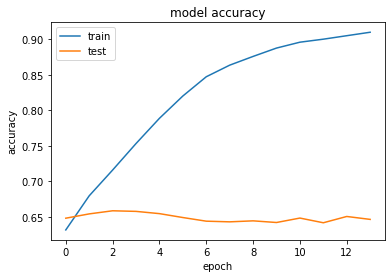

In [10]:
import matplotlib.pyplot as plt

plt.plot(fit_lr_history.history['accuracy'])
plt.plot(fit_lr_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Predict on non-SMOTE test set

In [5]:
X_test_nonsmote = pd.read_csv('xy_test_v2.csv', index_col=False)
y_test_nonsmote = X_test_nonsmote[["redlistCategory"]]
X_test_nonsmote = X_test_nonsmote.drop(columns=['internalTaxonId', 'Unnamed: 0', "redlistCategory"])

In [6]:
y_pred_nonsmote = nn_200.predict(X_test_nonsmote)
y_pred_nonsmote = [np.argmax(x) for x in y_pred_nonsmote]

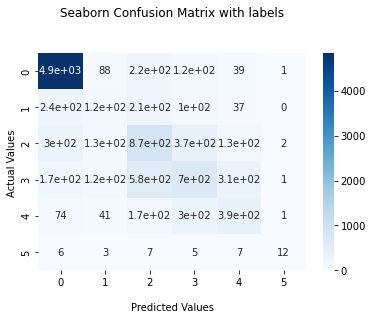

In [7]:
cf_matrix_nonsmote = confusion_matrix(y_test_nonsmote, y_pred_nonsmote)
ax_nonsmote = sns.heatmap(cf_matrix_nonsmote, annot=True, cmap='Blues')

ax_nonsmote.set_title('Seaborn Confusion Matrix with labels\n\n')
ax_nonsmote.set_xlabel('\nPredicted Values')
ax_nonsmote.set_ylabel('Actual Values ')
plt.show()

In [8]:
print(classification_report(y_test_nonsmote, y_pred_nonsmote, target_names=[str(i) for i in range(6)]))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      5326
           1       0.24      0.17      0.20       706
           2       0.42      0.48      0.45      1800
           3       0.44      0.37      0.40      1889
           4       0.42      0.40      0.41       971
           5       0.71      0.30      0.42        40

    accuracy                           0.65     10732
   macro avg       0.51      0.44      0.46     10732
weighted avg       0.63      0.65      0.64     10732



# Using Preprocessed Version 3
Preprocessed Version 2 + Multiple Encoding for features with "|" (ex: x|y=1 -> x=1, y=1)

In [12]:
X_train_nonsmote = pd.read_csv('xy_train_v3.csv', index_col=False)
y_train_nonsmote = X_train_nonsmote[["redlistCategory"]]
X_train_nonsmote = X_train_nonsmote.drop(columns=['internalTaxonId', 'Unnamed: 0', "redlistCategory"])

In [13]:
X_test_nonsmote = pd.read_csv('xy_test_v3.csv', index_col=False)
y_test_nonsmote = X_test_nonsmote[["redlistCategory"]]
X_test_nonsmote = X_test_nonsmote.drop(columns=['internalTaxonId', 'Unnamed: 0', "redlistCategory"])

In [14]:
#set random seed
tf.random.set_seed(42)
#create the model
nn_200=tf.keras.Sequential([
    tf.keras.layers.Dense(len(X_train_nonsmote.columns), activation="relu"),
    tf.keras.layers.Dense(70,activation="relu"),
    tf.keras.layers.Dense(70,activation="relu"),
    tf.keras.layers.Dense(30,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(6,activation="softmax")
])
#compile the model
nn_200.compile(
   #loss='categorical_crossentropy',
   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
   optimizer=tf.keras.optimizers.Adam(),
   metrics="accuracy")
#create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 )
#fit the model
epoch_num = 14
fit_lr_history =nn_200.fit(
   X_train_nonsmote,
   y_train_nonsmote,
   epochs=epoch_num,
   callbacks=[lr_scheduler],
   validation_data=(X_test_nonsmote,y_test_nonsmote),
   verbose=1)

Epoch 1/14

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1342/1342 [==============================] - 12s 9ms/step - loss: 0.9202 - accuracy: 0.6302 - val_loss: 0.8609 - val_accuracy: 0.6477
Epoch 2/14
1342/1342 [==============================] - 12s 9ms/step - loss: 0.8051 - accuracy: 0.6732 - val_loss: 0.8595 - val_accuracy: 0.6531
Epoch 3/14
1342/1342 [==============================] - 12s 9ms/step - loss: 0.7304 - accuracy: 0.7041 - val_loss: 0.8416 - val_accuracy: 0.6564
Epoch 4/14
1342/1342 [==============================] - 12s 9ms/step - lo

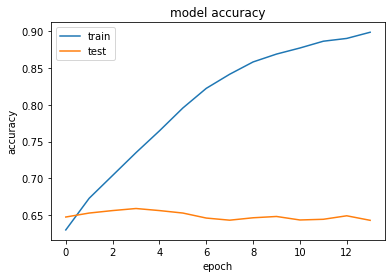

In [15]:
plt.plot(fit_lr_history.history['accuracy'])
plt.plot(fit_lr_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
y_pred_nonsmote = nn_200.predict(X_test_nonsmote)
y_pred_nonsmote = [np.argmax(x) for x in y_pred_nonsmote]

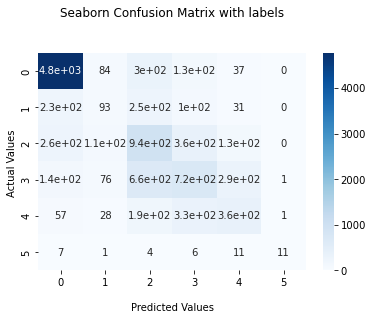

In [19]:
cf_matrix_nonsmote = confusion_matrix(y_test_nonsmote, y_pred_nonsmote)
ax_nonsmote = sns.heatmap(cf_matrix_nonsmote, annot=True, cmap='Blues')

ax_nonsmote.set_title('Seaborn Confusion Matrix with labels\n\n')
ax_nonsmote.set_xlabel('\nPredicted Values')
ax_nonsmote.set_ylabel('Actual Values ')
plt.show()

In [20]:
print(classification_report(y_test_nonsmote, y_pred_nonsmote, target_names=[str(i) for i in range(6)]))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      5326
           1       0.24      0.13      0.17       706
           2       0.40      0.52      0.45      1800
           3       0.44      0.38      0.41      1889
           4       0.42      0.37      0.40       971
           5       0.85      0.28      0.42        40

    accuracy                           0.64     10732
   macro avg       0.54      0.43      0.45     10732
weighted avg       0.63      0.64      0.64     10732



# Using Preprocessed Version 4
Preprocessed Versions 2 and 3 + Drop low (0) variance variables

In [21]:
X_train_nonsmote = pd.read_csv('xy_train_v4.csv', index_col=False)
y_train_nonsmote = X_train_nonsmote[["redlistCategory"]]
X_train_nonsmote = X_train_nonsmote.drop(columns=['internalTaxonId', 'Unnamed: 0', "redlistCategory"])

In [22]:
X_test_nonsmote = pd.read_csv('xy_test_v4.csv', index_col=False)
y_test_nonsmote = X_test_nonsmote[["redlistCategory"]]
X_test_nonsmote = X_test_nonsmote.drop(columns=['internalTaxonId', 'Unnamed: 0', "redlistCategory"])

In [23]:
#set random seed
tf.random.set_seed(42)
#create the model
nn_200=tf.keras.Sequential([
    tf.keras.layers.Dense(len(X_train_nonsmote.columns), activation="relu"),
    tf.keras.layers.Dense(70,activation="relu"),
    tf.keras.layers.Dense(70,activation="relu"),
    tf.keras.layers.Dense(30,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(6,activation="softmax")
])
#compile the model
nn_200.compile(
   #loss='categorical_crossentropy',
   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
   optimizer=tf.keras.optimizers.Adam(),
   metrics="accuracy")
#create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 )
#fit the model
epoch_num = 14
fit_lr_history =nn_200.fit(
   X_train_nonsmote,
   y_train_nonsmote,
   epochs=epoch_num,
   callbacks=[lr_scheduler],
   validation_data=(X_test_nonsmote,y_test_nonsmote),
   verbose=1)

Epoch 1/14

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1342/1342 [==============================] - 12s 9ms/step - loss: 0.9298 - accuracy: 0.6263 - val_loss: 0.8674 - val_accuracy: 0.6419
Epoch 2/14
1342/1342 [==============================] - 12s 9ms/step - loss: 0.8081 - accuracy: 0.6680 - val_loss: 0.8493 - val_accuracy: 0.6552
Epoch 3/14
1342/1342 [==============================] - 12s 9ms/step - loss: 0.7350 - accuracy: 0.6993 - val_loss: 0.8414 - val_accuracy: 0.6514
Epoch 4/14
1342/1342 [==============================] - 12s 9ms/step - lo

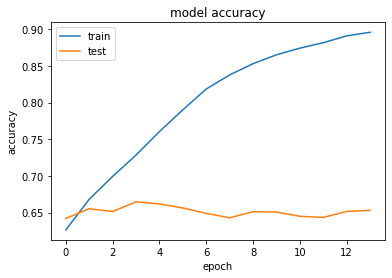

In [24]:
plt.plot(fit_lr_history.history['accuracy'])
plt.plot(fit_lr_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
y_pred_nonsmote = nn_200.predict(X_test_nonsmote)
y_pred_nonsmote = [np.argmax(x) for x in y_pred_nonsmote]

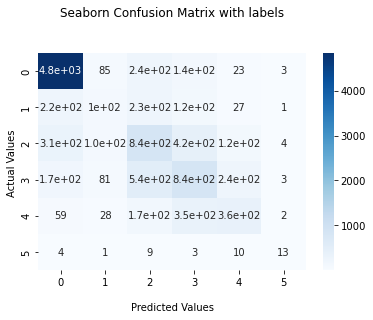

In [26]:
cf_matrix_nonsmote = confusion_matrix(y_test_nonsmote, y_pred_nonsmote)
ax_nonsmote = sns.heatmap(cf_matrix_nonsmote, annot=True, cmap='Blues')

ax_nonsmote.set_title('Seaborn Confusion Matrix with labels\n\n')
ax_nonsmote.set_xlabel('\nPredicted Values')
ax_nonsmote.set_ylabel('Actual Values ')
plt.show()

In [27]:
print(classification_report(y_test_nonsmote, y_pred_nonsmote, target_names=[str(i) for i in range(6)]))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      5326
           1       0.26      0.15      0.19       706
           2       0.41      0.47      0.44      1800
           3       0.45      0.45      0.45      1889
           4       0.46      0.37      0.41       971
           5       0.50      0.33      0.39        40

    accuracy                           0.65     10732
   macro avg       0.49      0.44      0.46     10732
weighted avg       0.64      0.65      0.64     10732



## SMOTEN
SMOTE Nominal Oversampling

In [28]:
X_train_nonsmote = pd.read_csv('xy_train_v4.csv', index_col=False)
y_train_nonsmote = X_train_nonsmote[["redlistCategory"]]
X_train_nonsmote = X_train_nonsmote.drop(columns=['internalTaxonId', 'Unnamed: 0', "redlistCategory"])

In [29]:
X_test_nonsmote = pd.read_csv('xy_test_v4.csv', index_col=False)
y_test_nonsmote = X_test_nonsmote[["redlistCategory"]]
X_test_nonsmote = X_test_nonsmote.drop(columns=['internalTaxonId', 'Unnamed: 0', "redlistCategory"])

In [30]:
smoten = SMOTEN(random_state=1)
X_train_smoten, y_train_smoten = smoten.fit_resample(X_train_nonsmote, y_train_nonsmote)

In [31]:
xy_train_smoten = X_train_smoten.copy()
xy_train_smoten["redlistCategory"] = y_train_smoten["redlistCategory"]
xy_train_smoten.to_csv("xy_train_smoten_v4.csv", index=False)

In [33]:
X_train_smoten

,systems_Freshwater (=Inland waters),systems_Marine,systems_Terrestrial,systems_Unknown,realm_Afrotropical,realm_Antarctic,realm_Australasian,realm_Indomalayan,realm_Nearctic,realm_Neotropical,...,usetrade_name_Medicine - human & veterinary,usetrade_name_Other (free text),usetrade_name_Other chemicals,usetrade_name_Other household goods,"usetrade_name_Pets/display animals, horticulture",usetrade_name_Poisons,usetrade_name_Research,usetrade_name_Sport hunting/specimen collecting,usetrade_name_Unknown,"usetrade_name_Wearing apparel, accessories"
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127981,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127982,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127983,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127984,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
#set random seed
tf.random.set_seed(42)
#create the model
nn_200_smoten=tf.keras.Sequential([
    tf.keras.layers.Dense(len(X_train_smoten.columns), activation="relu"),
    tf.keras.layers.Dense(70,activation="relu"),
    tf.keras.layers.Dense(70,activation="relu"),
    tf.keras.layers.Dense(30,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(6,activation="softmax")
])
#compile the model
nn_200_smoten.compile(
   #loss='categorical_crossentropy',
   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
   optimizer=tf.keras.optimizers.Adam(),
   metrics="accuracy")
#create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 )
#fit the model
epoch_num = 14
fit_lr_history =nn_200_smoten.fit(
   X_train_smoten,
   y_train_smoten,
   epochs=epoch_num,
   callbacks=[lr_scheduler],
   verbose=1)

Epoch 1/14

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

4000/4000 [==============================] - 34s 9ms/step - loss: 0.8558 - accuracy: 0.6562
Epoch 2/14
4000/4000 [==============================] - 33s 8ms/step - loss: 0.6631 - accuracy: 0.7430
Epoch 3/14
4000/4000 [==============================] - 33s 8ms/step - loss: 0.5696 - accuracy: 0.7822
Epoch 4/14
4000/4000 [==============================] - 34s 9ms/step - loss: 0.5038 - accuracy: 0.8082
Epoch 5/14
4000/4000 [==============================] - 33s 8ms/step - loss: 0.4544 - accuracy: 

In [35]:
y_pred_smoten = nn_200_smoten.predict(X_test_nonsmote)
y_pred_smoten = [np.argmax(x) for x in y_pred_smoten]

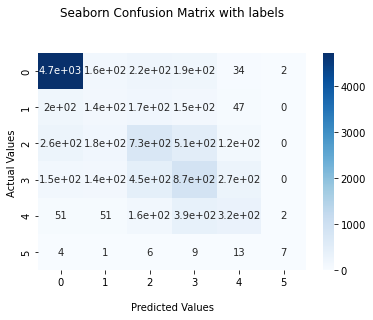

In [36]:
cf_matrix_smoten = confusion_matrix(y_test_nonsmote, y_pred_smoten)
ax_smoten = sns.heatmap(cf_matrix_smoten, annot=True, cmap='Blues')

ax_smoten.set_title('Seaborn Confusion Matrix with labels\n\n')
ax_smoten.set_xlabel('\nPredicted Values')
ax_smoten.set_ylabel('Actual Values ')
plt.show()

In [37]:
print(classification_report(y_test_nonsmote, y_pred_smoten, target_names=[str(i) for i in range(6)]))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      5326
           1       0.21      0.20      0.20       706
           2       0.42      0.41      0.41      1800
           3       0.41      0.46      0.44      1889
           4       0.40      0.33      0.36       971
           5       0.64      0.17      0.27        40

    accuracy                           0.63     10732
   macro avg       0.49      0.41      0.43     10732
weighted avg       0.63      0.63      0.63     10732



# Using Preprocessed Version 5
Currently in Preprocessing_v2.ipynb <br>
Preprocessed Versions 2-4 + Feature (Number of countries species is present)

In [38]:
X_train_nonsmote = pd.read_csv('xy_train_v5.csv', index_col=False)
y_train_nonsmote = X_train_nonsmote[["redlistCategory"]]
X_train_nonsmote = X_train_nonsmote.drop(columns=['internalTaxonId', 'Unnamed: 0', "redlistCategory"])

In [39]:
X_test_nonsmote = pd.read_csv('xy_test_v5.csv', index_col=False)
y_test_nonsmote = X_test_nonsmote[["redlistCategory"]]
X_test_nonsmote = X_test_nonsmote.drop(columns=['internalTaxonId', 'Unnamed: 0', "redlistCategory"])

In [40]:
#set random seed
tf.random.set_seed(42)
#create the model
nn_200=tf.keras.Sequential([
    tf.keras.layers.Dense(len(X_train_nonsmote.columns), activation="relu"),
    tf.keras.layers.Dense(70,activation="relu"),
    tf.keras.layers.Dense(70,activation="relu"),
    tf.keras.layers.Dense(30,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(6,activation="softmax")
])
#compile the model
nn_200.compile(
   #loss='categorical_crossentropy',
   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
   optimizer=tf.keras.optimizers.Adam(),
   metrics="accuracy")
#create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 )
#fit the model
epoch_num = 14
fit_lr_history =nn_200.fit(
   X_train_nonsmote,
   y_train_nonsmote,
   epochs=epoch_num,
   callbacks=[lr_scheduler],
   validation_data=(X_test_nonsmote,y_test_nonsmote),
   verbose=1)

Epoch 1/14

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1342/1342 [==============================] - 20s 15ms/step - loss: 0.9164 - accuracy: 0.6331 - val_loss: 0.8536 - val_accuracy: 0.6457
Epoch 2/14
1342/1342 [==============================] - 19s 14ms/step - loss: 0.8029 - accuracy: 0.6729 - val_loss: 0.8584 - val_accuracy: 0.6519
Epoch 3/14
1342/1342 [==============================] - 16s 12ms/step - loss: 0.7357 - accuracy: 0.7009 - val_loss: 0.8423 - val_accuracy: 0.6544
Epoch 4/14
1342/1342 [==============================] - 16s 12ms/step 

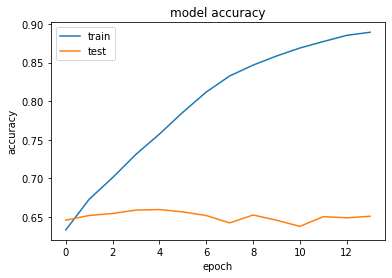

In [41]:
plt.plot(fit_lr_history.history['accuracy'])
plt.plot(fit_lr_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
y_pred_nonsmote = nn_200.predict(X_test_nonsmote)
y_pred_nonsmote = [np.argmax(x) for x in y_pred_nonsmote]

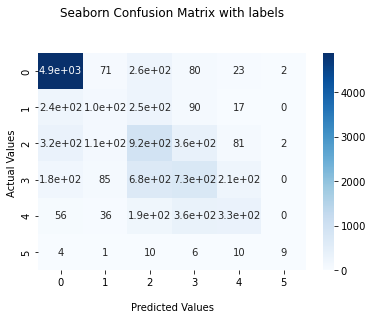

In [43]:
cf_matrix_nonsmote = confusion_matrix(y_test_nonsmote, y_pred_nonsmote)
ax_nonsmote = sns.heatmap(cf_matrix_nonsmote, annot=True, cmap='Blues')

ax_nonsmote.set_title('Seaborn Confusion Matrix with labels\n\n')
ax_nonsmote.set_xlabel('\nPredicted Values')
ax_nonsmote.set_ylabel('Actual Values ')
plt.show()

In [44]:
print(classification_report(y_test_nonsmote, y_pred_nonsmote, target_names=[str(i) for i in range(6)]))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      5326
           1       0.26      0.15      0.19       706
           2       0.40      0.51      0.45      1800
           3       0.45      0.39      0.42      1889
           4       0.49      0.34      0.40       971
           5       0.69      0.23      0.34        40

    accuracy                           0.65     10732
   macro avg       0.52      0.42      0.45     10732
weighted avg       0.64      0.65      0.64     10732



# Using Preprocessed Version 6
Currently in Preprocessing_v2.ipynb <br>
Preprocessed Version 5 but with categories 1-5 merged.

In [4]:
X_train_nonsmote = pd.read_csv('xy_train_v6.csv', index_col=False)
y_train_nonsmote = X_train_nonsmote[["redlistCategory"]]
X_train_nonsmote = X_train_nonsmote.drop(columns=['internalTaxonId', 'Unnamed: 0', "redlistCategory"])

In [5]:
X_test_nonsmote = pd.read_csv('xy_test_v6.csv', index_col=False)
y_test_nonsmote = X_test_nonsmote[["redlistCategory"]]
X_test_nonsmote = X_test_nonsmote.drop(columns=['internalTaxonId', 'Unnamed: 0', "redlistCategory"])

In [6]:
#set random seed
tf.random.set_seed(42)
#create the model
nn_200=tf.keras.Sequential([
    tf.keras.layers.Dense(len(X_train_nonsmote.columns), activation="relu"),
    tf.keras.layers.Dense(70,activation="relu"),
    tf.keras.layers.Dense(70,activation="relu"),
    tf.keras.layers.Dense(30,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(6,activation="softmax")
])
#compile the model
nn_200.compile(
   #loss='categorical_crossentropy',
   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
   optimizer=tf.keras.optimizers.Adam(),
   metrics="accuracy")
#create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 )
#fit the model
epoch_num = 14
fit_lr_history =nn_200.fit(
   X_train_nonsmote,
   y_train_nonsmote,
   epochs=epoch_num,
   callbacks=[lr_scheduler],
   validation_data=(X_test_nonsmote,y_test_nonsmote),
   verbose=1)

2022-06-01 15:51:15.045718: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/14
1342/1342 [==============================] - 31s 21ms/step - loss: 0.3059 - accuracy: 0.8764 - val_loss: 0.2556 - val_accuracy: 0.8947 - lr: 0.0010
Epoch 2/14
1342/1342 [==============================] - 27s 20ms/step - loss: 0.2285 - accuracy: 0.9050 - val_loss: 0.2539 - val_accuracy: 0.8969 - lr: 0.0010
Epoch 3/14
1342/1342 [==============================] - 27s 20ms/step - loss: 0.1964 - accuracy: 0.9196 - val_loss: 0.2589 - val_accuracy: 0.8933 - lr: 0.0010
Epoch 4/14
1342/1342 [==============================] - 26s 20ms/step - loss: 0.1691 - accuracy: 0.9312 - val_loss: 0.2919 - val_accuracy: 0.8978 - lr: 0.0010
Epoch 5/14
1342/1342 [==============================] - 27s 20ms/step - loss: 0.1436 - accuracy: 0.9416 - val_loss: 0.3155 - val_accuracy: 0.8935 - lr: 0.0010
Epoch 6/14
1342/1342 [==============================] - 29s 22ms/step - loss: 0.1246 - accuracy: 0.9486 - val_loss: 0.3255 - val_accuracy: 0.8948 - lr: 0.0010
Epoch 7/14
1342/1342 [========================

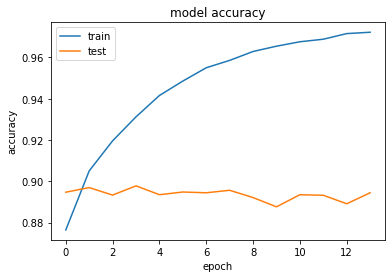

In [7]:
plt.plot(fit_lr_history.history['accuracy'])
plt.plot(fit_lr_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
y_pred_nonsmote = nn_200.predict(X_test_nonsmote)
y_pred_nonsmote = [np.argmax(x) for x in y_pred_nonsmote]

336/336 [==============================] - 3s 9ms/step


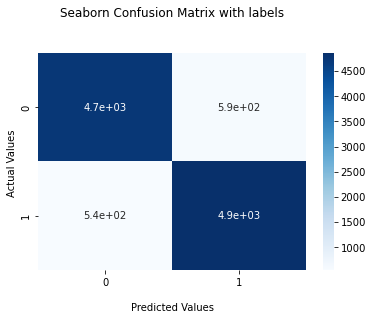

In [9]:
cf_matrix_nonsmote = confusion_matrix(y_test_nonsmote, y_pred_nonsmote)
ax_nonsmote = sns.heatmap(cf_matrix_nonsmote, annot=True, cmap='Blues')

ax_nonsmote.set_title('Seaborn Confusion Matrix with labels\n\n')
ax_nonsmote.set_xlabel('\nPredicted Values')
ax_nonsmote.set_ylabel('Actual Values ')
plt.show()

In [11]:
print(classification_report(y_test_nonsmote, y_pred_nonsmote, target_names=[str(i) for i in range(2)]))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      5326
           1       0.89      0.90      0.90      5406

    accuracy                           0.89     10732
   macro avg       0.89      0.89      0.89     10732
weighted avg       0.89      0.89      0.89     10732

